Jornada Cientista de Dados - Let´s Data
Churn Rate (porcentagem de clientes que deixam a empresa)

È um problema recorrente em muitas empresas, e qual é a melhor forma de reter seus clientes.

Para resolver esse tipo de problema precisamos ter uma base histórica de clientes que saíram da empresa, bem como suas características.

Bancos, telefônicas, varejo, qualquer empresa que presta algum tipo de serviços e possui informações sobre seus clientes pode se beneficiar de modelos preditivos similares aos que iremos construir.

Nesse projeto, vamos construir um modelo para ajudar uma a manter seus clientes. Faremos isso criando modelos para classificar os clientes em "churn" ou "não churn", ou seja, se irão cancelar os serviços ou não.

A base utilizada pode ser obtida no Kaggle e se trata de uma empresa telefônica fictícia com dados demográficos e de serviços contratados pelos clientes com a informação se saiu ou não da empresa.

In [1]:
!pip install scikit-learn pandas seaborn xgboost

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [3]:
df_clientes = pd.read_csv('./data/train.csv')
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [4]:
df_clientes.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#ver se cada cliente é uma linha
df_clientes['id'].is_unique

True

Entendendo as colunas:

id: identificação do cliente
gender: sexo do cliente
SeniorCitizen: indicador se é um(a) idoso(a)
Partner: indicador se tem um parceiro(a)
Dependents: indicador se possui dependentes
tenure: quantos meses o cliente está na empresa
PhoneService: indicador se possui serviços de telefonia
MultipleLines: indicador se possui múltiplas linhas telefônicas
InternetService: indicador se possui serviços de internet
OnlineSecurity: indicador se possui serviços de segurança online
OnlineBackup: indicador se possui serviços de backup online
DeviceProtection: indicador se possui serviços de proteção de equipamentos
TechSupport: indicador se possui serviços de suporte técnico
StreamingTV: indicador se possui serviços de streaming de tv
StreamingMovies: indicador se possui serviços de streaming de filmes
Contract: tipo de contrato
PaperlessBilling: indicador se a cobrança é via papel ou não (cobrança eletrônica)
PaymentMethod: indicador do tipo de pagamento
MonthlyCharges: valor mensal dos serviços
TotalCharges: valor total dos serviços desde o início do contrato
Churn: indicador se saiu da empresa ou não

In [6]:
# indice atificial automatico 
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
# tranformado o ID em indice do dataframe, agora está o id como indice
df_clientes = df_clientes.set_index('id')
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [8]:
#quantidade de 20 colunas = 19 variável preditora e uma variável de churn
df_clientes.shape

(5634, 20)

In [9]:
# tipos os dois deveriam ser float
#MonthlyCharges: valor mensal dos serviços
#TotalCharges: valor total dos serviços desde o início do contrato
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [10]:
# info
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

In [11]:
# total charges está com object - vamos tranformar em float
df_clientes['TotalCharges'].dtype

dtype('O')

In [12]:
#contar os valores, valor em branco espaços
df_clientes['TotalCharges'].value_counts()

20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2
145.15     2

In [13]:
#provavelmente está object por causa destes espaços em branco
#vamos tirar todos os espaços primeiro. Substituir estes espaços em branco por null
#Usando expressão regular simples \s (barra S) é qualquer tipo de espaço
#caracteres de espaço, seja espaço simples ou tabulação. \s+ pega uma ou mais sequência de espaço em branco

df_clientes['TotalCharges']=df_clientes['TotalCharges'].replace('\s+', '',regex=True)

In [14]:
#os espaços agora estão nulos
df_clientes['TotalCharges'].value_counts()

20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2
145.15     2

In [15]:
#tentando convertenco para float, da pau, pq o astype não tranforma os vazios
# errado - df_clientes['TotalCharges'].astype(float)
# o astype não trata os erro para isso utiliza o to_numeric
#não funciona o astype pq existe valores sem conversão para float

#fazendo um filtro para ver onde o totalcharde está em branco
df_clientes.loc[df_clientes['TotalCharges'] =='']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
6755,Male,0,No,Yes,0.00,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5219,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6671,Female,0,Yes,Yes,0.00,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
937,Female,0,Yes,Yes,0.00,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
3827,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
1083,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
3332,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
1341,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [16]:
#para converte utilizar o to_numeric
pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

id
4030   2560.10
6731    332.65
6479   6640.70
6861   3545.35
3266   1974.80
6368   3442.80
5830   1848.80
4476     61.05
1508   1008.70
2921   6155.40
3145    110.15
333    4422.95
2140    458.10
3427     69.80
3379   6033.10
3163   1394.55
6471    345.50
2350   6565.85
3756    318.90
305    3141.70
6458    792.15
1124   1611.00
670    4039.30
878    3077.00
1507   3794.50
2258   4847.05
4152   3094.05
4416   4428.45
2989   7880.25
520     265.45
5701   2414.55
4982    712.75
2187    862.40
3008   2276.95
956      44.70
2866   7082.50
982     808.95
3762   5919.35
2295   1253.90
4733   1397.30
979    6383.35
192     531.00
676    7246.15
3451   7308.95
4322   1058.10
3331   4913.30
6666   1224.05
925    1820.90
3090   5646.60
5755    454.05
741    2879.90
4226    158.35
2020   7040.85
1471    156.85
1109   1678.05
832     963.95
3482    214.55
5644     75.90
6152    672.55
5899    800.30
6918   6052.25
3610   6423.00
2474    119.30
3220    571.75
1693    947.75
4811   1424.95
3122   

In [17]:
# Pegando os índices das linhas que tem nulos pra saber como o to_numeric converte
indices_total_charges_nulo = df_clientes.loc[df_clientes['TotalCharges'] == ''].index
indices_total_charges_nulo

Int64Index([6755, 5219, 6671, 937, 3827, 1083, 3332, 1341], dtype='int64', name='id')

In [18]:
# Filtrando pelos índices pra ver como o to_numeric realiza a correção de erros
#tranformando os espaços em branco em NaN = not a number
pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')[indices_total_charges_nulo]

id
6755   NaN
5219   NaN
6671   NaN
937    NaN
3827   NaN
1083   NaN
3332   NaN
1341   NaN
Name: TotalCharges, dtype: float64

In [19]:
# converter tudo que não é numérico para NaN
df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

In [20]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [21]:
#medidas estatisticas, tendência central, dispersão, separatrizes.
#distribuição para conhecermos melhor os dados, tenure, cobrança mensal, total, base desbalanceada.
df_clientes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


<AxesSubplot:xlabel='tenure', ylabel='Count'>

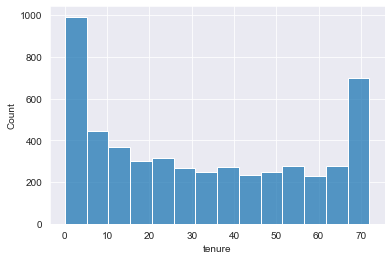

In [22]:
# Analisando a distribuição de tenure - meses de empresa
sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_clientes, x='tenure')

In [23]:
#avaliar os valores que estão proximos a zero
len(df_clientes.loc[df_clientes['tenure']==0])

8

In [24]:
len(df_clientes.loc[df_clientes['tenure']<5])

893

In [25]:
#decis, linspace divide em espaços iguais
df_clientes.describe(percentiles=np.linspace(0,1,11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


In [26]:
len(df_clientes.loc[df_clientes['tenure']==72])

259

In [27]:
# porcentagem de clientes que estão a 5 messes ou menos na empresa
100 * len(df_clientes.loc[df_clientes['tenure']<=5]) / df_clientes.shape[0]

17.607383741569045

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

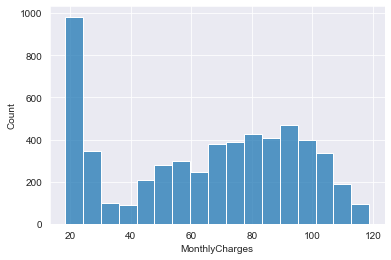

In [28]:
#Cobrança mensal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='MonthlyCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

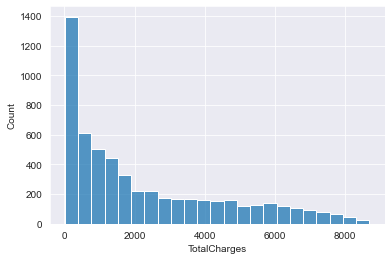

In [29]:
#cobrança total
sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_clientes,x='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='count'>

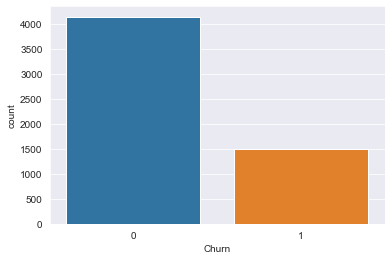

In [30]:
#variável target: churn - cancelou ou não o serviço
sns.countplot(data=df_clientes, x="Churn")

In [31]:
#a base esatá desbalanceada, temos que ter cuidado com a métrica
len(df_clientes.loc[df_clientes['Churn']==0]), len(df_clientes.loc[df_clientes['Churn']==1])

(4139, 1495)

In [32]:
# Acurácia
100 * len(df_clientes.loc[df_clientes['Churn']==0]) / df_clientes.shape[0]

73.46467873624424

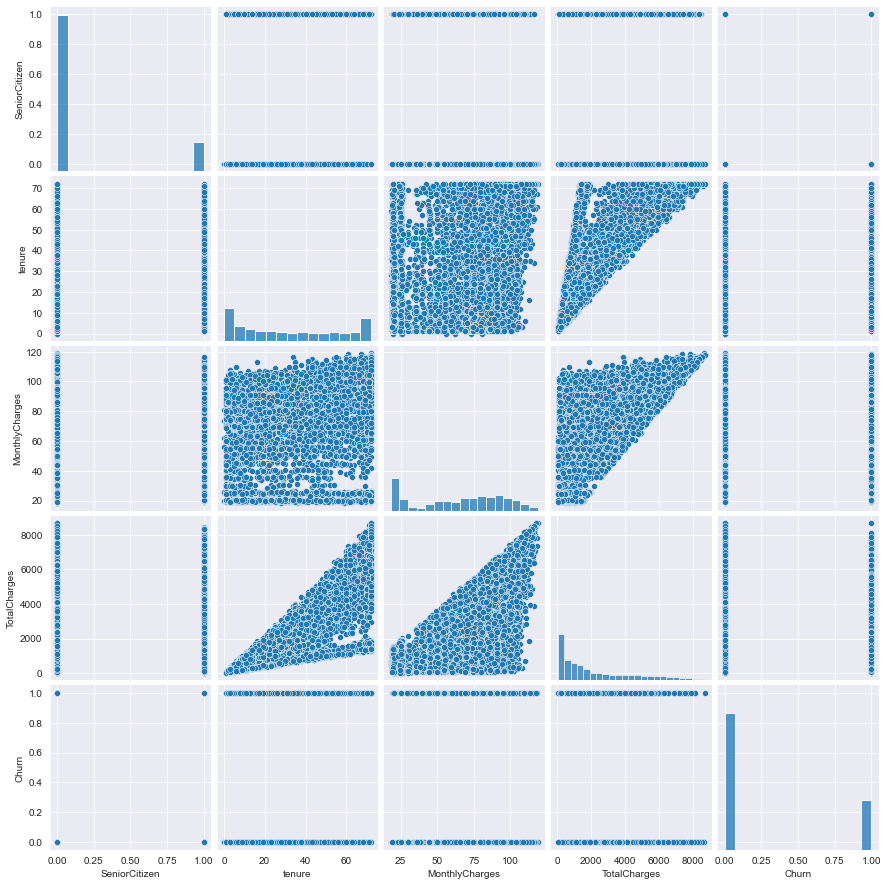

In [33]:
#Relação entre as features e a variável target, dispersão da variável preditora com o churn
sns.pairplot(data=df_clientes)

In [34]:
#codificação das variáveis categóricas
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.10,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


In [35]:
df_clientes._get_numeric_data()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
id,,,,,
4030,0,56.00,45.05,2560.10,0
6731,0,NaN,19.65,332.65,0
6479,0,60.00,110.80,6640.70,0
6861,0,37.00,101.90,3545.35,1
3266,0,29.00,70.75,1974.80,1
6368,0,70.00,48.40,3442.80,0
5830,0,31.00,59.95,1848.80,0
4476,0,3.00,19.55,61.05,0
1508,0,54.00,19.65,1008.70,0


In [36]:
#analisar quantas classes possuem as variáveis categóricas
df_clientes._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [37]:
#exemplo de list comprehension
[coluna for coluna in df_clientes.columns]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [38]:
colunas_categoricas=[coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [39]:
#valores de cada variável categorica
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64

No     2902
Yes    2732
Name: Partner, dtype: int64

No     3793
Yes    1623
Name: Dependents, dtype: int64

Yes    5082
No      552
Name: PhoneService, dtype: int64

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Yes    3312
No     2322
Name: PaperlessBilling, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

In [40]:
# as variáveis genger, partner, dependents, phone service e paperless billing possuem duas classes sim ou não
#mapear diretamente

df_clientes['gender'] = df_clientes ['gender'].map({'Female': 1, 'Male': 0})

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for coluna_binaria in colunas_binarias:
    df_clientes[coluna_binaria] = df_clientes[coluna_binaria].map({'Yes': 1, 'No': 0})

In [41]:
# ver se mudou para Yes = 1 e No = 0 

display(df_clientes['gender'].value_counts())

for colunas_binaria in colunas_binarias:
    display(df_clientes[colunas_binaria].value_counts())

0    2849
1    2785
Name: gender, dtype: int64

0    2902
1    2732
Name: Partner, dtype: int64

0.00    3793
1.00    1623
Name: Dependents, dtype: int64

1    5082
0     552
Name: PhoneService, dtype: int64

1    3312
0    2322
Name: PaperlessBilling, dtype: int64

In [42]:
#Dependents tem missingdata valor nulos
df_clientes.loc[:,colunas_binarias + ['gender']].isnull().sum()

Partner               0
Dependents          218
PhoneService          0
PaperlessBilling      0
gender                0
dtype: int64

In [43]:
#colunas ainda são categoricas
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]  
colunas_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [44]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

Contracts é ordinal, porque possui uma diferença entre os tipos de contratos mensais, anuais e bianuais.

InternetService - ordinal, devido ao valor da intenet fibra ser mais cara que a ADSL.

PaymentMethhod - ordinal devido a cobrança pelo correio ser mais lenta que as automáticas e eletronicas.

In [45]:
#tranformando as variaveis categóricas ordinais em numéricas contracts, internetservice e paymentmethode em
df_clientes['Contract'] = df_clientes['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_clientes['InternetService'] = df_clientes['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_clientes['PaymentMethod'] = df_clientes['PaymentMethod'].map({'Mailed check': 0, 
                                                                 'Electronic check': 1, 
                                                                 'Bank transfer (automatic)': 2,
                                                                 'Credit card (automatic)': 3})
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1


In [46]:
# atualizando as colunas que são categóricas nominais
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [47]:
#OneHotEncoder para variáveis categoricas nominais 
from sklearn.preprocessing import OneHotEncoder

In [48]:
ohe = OneHotEncoder(sparse=False, drop='first')
df_ohe_transformadas = ohe.fit_transform(df_clientes[colunas_categoricas])
ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [49]:
#features out
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [50]:
df_ohe_transformadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [51]:
# Tranformando o array numpy em colunas.
df_ohe_transformadas = pd.DataFrame(data=df_ohe_transformadas, columns=ohe.get_feature_names_out(), index=df_clientes.index)
df_ohe_transformadas.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
df_ohe_transformadas.shape

(5634, 14)

In [53]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1


In [54]:
#concatenar os dois DataFrame igual o Join do SQL
df_clientes = pd.concat([df_clientes, df_ohe_transformadas],axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [55]:
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [56]:
df_clientes = df_clientes.drop(colunas_categoricas, axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [57]:
df_clientes.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [58]:
X = df_clientes.drop('Churn', axis=1) # Variável X todos menos o churn
y = df_clientes[['Churn']] # variável dependente

In [59]:
#variável preditora ou feature
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [60]:
#variável dependente ou target
y.head()

,Churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


Separação de Bases

In [61]:
#Cross validation para separar a base em treino e teste
from sklearn.model_selection import train_test_split

In [62]:
#tupla com 4 elementos: x de treino, x de teste; y de treino e y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, #preditora
                                                        y, #target
                                                        test_size=.2,
                                                        random_state=42)

#vamos ver quantas linhas ficaram de treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((4507, 26), (1127, 26), (4507, 1), (1127, 1))

In [63]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
y_treino.head()

,Churn
id,
3559,0
896,0
3600,0
6991,0
5455,1


In [65]:
X_treino.shape[0] / X.shape[0]

0.7999645012424565

In [66]:
#Tratamento de dados faltantes MISSING DATA
X_treino.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              171
tenure                                  366
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            78
MonthlyCharges                            0
TotalCharges                              6
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [67]:
X_teste.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                              47
tenure                                  95
PhoneService                             0
InternetService                          0
Contract                                 0
PaperlessBilling                         0
PaymentMethod                           21
MonthlyCharges                           0
TotalCharges                             2
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [68]:
#para tratar missing data iremos usar cross validation
#utilizar as medidas de tendencia central; méida, mediana e a moda
X_treino_original = X_treino.copy()
X_teste_original = X_teste.copy()

y_treino_original = y_treino.copy()
y_teste_original = y_teste.copy()

In [69]:
#quais colunas tem missing data treino
X_treino.loc[:,X_treino.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [70]:
#quais colunas tem missing data teste
X_teste.loc[:,X_teste.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [71]:
#para as variáveis numerica utilizaremos a mediana, para as categoricas a moda
mediana_tenure = X_treino['tenure'].median()
mediana_dependents = X_treino['Dependents'].median()
mediana_total_charges = X_treino['TotalCharges'].median()
moda_payment_method = X_treino['PaymentMethod'].value_counts().index[0]

mediana_tenure, mediana_dependents, mediana_total_charges, moda_payment_method

(29.0, 0.0, 1389.6, 1.0)

In [72]:
#filtra pelas linhas e traz todas as colunas
X_treino.loc[X_treino['tenure'].isnull(), :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
746,1,1,1,0.00,NaN,1,2,2,1,3.00,110.80,7882.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
2036,1,0,0,1.00,NaN,1,1,0,1,1.00,63.95,2737.05,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
578,0,0,0,0.00,NaN,1,2,0,1,1.00,70.50,597.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4696,1,0,0,0.00,NaN,1,0,1,0,0.00,20.75,700.45,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
4358,1,0,1,0.00,NaN,1,0,0,0,3.00,20.45,330.80,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6087,0,0,1,0.00,NaN,1,1,2,1,0.00,69.90,4226.70,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3927,0,0,0,0.00,NaN,0,1,0,0,0.00,34.70,383.55,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
5008,0,0,0,0.00,NaN,1,0,0,0,0.00,20.60,541.50,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
3943,0,0,0,0.00,NaN,1,1,0,1,1.00,42.90,42.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [73]:
#tudo onde form nul substituir pe mediana ou moda
X_treino.loc[X_treino['tenure'].isnull(), 'tenure'] = mediana_tenure
X_treino.loc[X_treino['Dependents'].isnull(), "Dependents"] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [74]:
#atribuição no teste 
#foi tudo calculado na base de treino
X_teste.loc[X_teste['tenure'].isnull(), 'tenure'] = mediana_tenure
X_teste.loc[X_teste['Dependents'].isnull(), "Dependents"] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [75]:
#Machine Learning, primeio regreção logistica, para classificação, e usaremos cross validation
#importar 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [76]:
#criar o algoritimo
#alterar o numero de iterações 
regressao_logistica = LogisticRegression (max_iter=500)

In [77]:
type(regressao_logistica)

sklearn.linear_model._logistic.LogisticRegression

In [78]:
#crossvalidation
valores_f1_rl = cross_val_score(estimator=regressao_logistica, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10,
                                  scoring='f1') 
valores_f1_rl

array([0.61607143, 0.61802575, 0.59030837, 0.55506608, 0.6367713 ,
       0.63519313, 0.68122271, 0.58035714, 0.54901961, 0.60792952])

In [79]:
len(valores_f1_rl)

10

In [80]:
media_f1_rl = valores_f1_rl.mean()
f'f1-score: {media_f1_rl*100}'

'f1-score: 60.699650360216005'

In [81]:
# Ramdon Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# Cross Validation
valores_f1_rf = cross_val_score(estimator = random_forest,
                                         X=X_treino,
                                         y=y_treino.values.flatten(),
                                         cv=10,
                                        scoring='f1')
valores_f1_rf


array([0.59047619, 0.57657658, 0.57142857, 0.46889952, 0.61165049,
       0.62325581, 0.62962963, 0.53846154, 0.52380952, 0.59433962])

In [82]:
media_f1_rf = valores_f1_rf.mean()
f'f1-score: {media_f1_rf*100}'

'f1-score: 57.28527473945022'

In [83]:
# XGBoost
import xgboost as xgb

In [84]:
xgb_model = xgb.XGBClassifier(rondom_state=42, objective='binary:logistic', use_label_encoder=False, eval_metric='error')

In [85]:
type(xgb_model)

xgboost.sklearn.XGBClassifier

In [86]:
# Cross Validation
valores_f1_xgb = cross_val_score(estimator = xgb_model,
                                         X=X_treino,
                                         y=y_treino.values.flatten(),
                                         cv=10,
                                        scoring='f1')
valores_f1_xgb


[04:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "rondom_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "rondom_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "rondom_state" } might not be used.

  Thi

array([0.55605381, 0.60344828, 0.58723404, 0.48181818, 0.57009346,
       0.59728507, 0.5814978 , 0.56140351, 0.54716981, 0.59459459])

In [87]:
media_f1_xgb = valores_f1_xgb.mean()
f'f1-score: {media_f1_xgb*100}'

'f1-score: 56.805985497539716'

In [88]:
# dados faltantes
X.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              218
tenure                                  461
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            99
MonthlyCharges                            0
TotalCharges                              8
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [89]:
X_treino['tenure'] = X_treino_original['tenure']
X_teste['tenure'] = X_teste_original['tenure']

In [90]:
X_treino['tenure'].isnull().sum()

366

In [91]:
X_teste['tenure'].isnull().sum()

95

In [92]:
#todas as linas onde o tenure for null, vou pegar o valor de total charges daquela linha dividido pelo valor de monthly charges
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']

In [93]:
len(X_treino.loc[X_treino['tenure'].isna()])

0

In [94]:
# modelo sem missing data para tenure
rl_2 = LogisticRegression(max_iter=500)

# cross validation
valores_f1_rl2 = cross_val_score(estimator=rl_2, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10, 
                                  scoring='f1')
valores_f1_rl2

array([0.61607143, 0.64935065, 0.60606061, 0.56637168, 0.6460177 ,
       0.65      , 0.6779661 , 0.61135371, 0.58095238, 0.64      ])

In [95]:
media_f1_rl2 = valores_f1_rl2.mean()

f'f1-score: {media_f1_rl2*100}'

'f1-score: 62.441442589513464'

Outra forma de imputar dados faltantes é utilizar KNN - nearest neighbors, usa similaridades entre pontos vizinhos.
Iremos utilizar para Dpendentes.

In [96]:
X_treino['Dependents'].isnull().sum()

0

In [97]:
# vamos voltar ele no original
X_treino['Dependents'] = X_treino_original['Dependents']
X_treino['Dependents'].isnull().sum()

171

In [98]:
X_treino.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              171
tenure                                    0
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                             0
MonthlyCharges                            0
TotalCharges                              0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [99]:
from sklearn.impute import KNNImputer

imputacao_knn = KNNImputer(n_neighbors=2)
treino_imputado = imputacao_knn.fit_transform(X_treino)
treino_imputado

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [100]:
imputacao_knn.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [101]:
treino_imputado.shape

(4507, 26)

In [102]:
treino_imputado[:, 3]

array([0.5, 0. , 1. , ..., 0.5, 1. , 1. ])

In [103]:
X_treino['Dependents'] = treino_imputado[:, 3]

In [104]:
X_treino['Dependents'].isnull().sum()

0

In [105]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [106]:
X_treino_original.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [107]:
# Testando modelo com diferente missing data para dependents
rl_3 = LogisticRegression(max_iter=500)

# Vamos treinar utilizando cross validation
valores_f1_rl3 = cross_val_score(estimator=rl_3, 
                                  X=X_treino, 
                                  y=y_treino.values.flatten(), 
                                  cv=10, # 10-fold CV
                                  scoring='f1')
valores_f1_rl3

array([0.60089686, 0.65217391, 0.63203463, 0.55263158, 0.6460177 ,
       0.65271967, 0.67234043, 0.62608696, 0.58215962, 0.62780269])

In [108]:
media_f1_rl3 = valores_f1_rl3.mean()


f'f1-score: {media_f1_rl3*100}'

'f1-score: 62.44864046448796'

In [115]:
#machine learning
#criar uma coluna para o cliente com ou sem internet, através da coluna InternetService
X_treino['internet'] = X_treino['InternetService'].isin([1, 2]).astype(int)

#criar uma coluna para ver se o cliente possui fidelidade, através da coluna Contract
X_treino['fidelidade'] = X_treino['Contract'].isin([1, 2]).astype(int)

#cria uma coluna com a quantidade de serviços que o cliente possui
X_treino['numero_de_servicos'] = X_treino['internet'] + X_treino['OnlineSecurity_Yes'] + \
        X_treino['MultipleLines_Yes'] + X_treino['OnlineBackup_Yes'] + \
        X_treino['DeviceProtection_Yes'] + X_treino['TechSupport_Yes'] + \
        X_treino['StreamingTV_Yes'] + X_treino['StreamingMovies_Yes'] + \
        X_treino['PhoneService']

#Criar um valor medio de cobrança
X_treino['media_de_cobranca_por_servico'] = X_treino['MonthlyCharges'] / X_treino['numero_de_servicos']

X_treino.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,internet,fidelidade,numero_de_servicos,media_de_cobranca_por_servico
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,1,5.00,18.44
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,0,6.00,15.72
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1,0,8.00,10.16
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,0,5.00,18.72
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,2.00,34.77


In [118]:
#Testando se o modelo melhorou com diferentes missing data para dependents
rl_4 = LogisticRegression(max_iter=500)

#Cross Validation
valores_f1_rl4 = cross_val_score(estimator=rl_4,
                                X=X_treino,
                                y=y_treino.values.flatten(),
                                cv=10,
                                scoring='f1')
valores_f1_rl4

array([0.64317181, 0.65217391, 0.60944206, 0.57017544, 0.65470852,
       0.65289256, 0.65236052, 0.60714286, 0.59259259, 0.63436123])

In [119]:
media_f1_rl4 = valores_f1_rl4.mean()

f'f1-score: {media_f1_rl4*100}'

'f1-score: 62.690214982931344'

In [120]:
#Modelo campeão foi a regressão logistica com tenure imputado com o total cobrança dividido pela cobrança mensal
#agora vamos treinar o modelo na base de treinamento toda

X_treino = X_treino_original
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()


gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [121]:
# Mesmo com teste
X_teste = X_teste_original
X_teste.loc[X_teste['tenure'].isna(), 'tenure'] = X_teste.loc[X_teste['tenure'].isna(), 'TotalCharges'] / X_teste.loc[X_teste['tenure'].isna(), 'MonthlyCharges']
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_teste.isnull().sum()


gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [122]:
regressao_logistica.fit(X_treino, y_treino.values.flatten())

LogisticRegression(max_iter=500)

In [123]:
regressao_logistica.coef_

array([[-2.37804212e-03,  3.54181781e-01, -4.80491529e-02,
        -2.12308507e-01, -7.35553087e-02, -3.39133161e-01,
         4.24284072e-01, -7.69726601e-01,  4.47053833e-01,
        -2.47967780e-02,  2.35829318e-03,  5.06361737e-04,
         8.48023345e-02,  2.38468384e-01, -1.26731025e-01,
        -5.69240612e-01, -1.26731025e-01, -2.44325196e-01,
        -1.26731025e-01, -1.73809741e-01, -1.26731025e-01,
        -4.82129453e-01, -1.26731025e-01,  1.59712937e-01,
        -1.26731025e-01,  1.12373134e-01]])

In [124]:
df_coeficientes = pd.DataFrame(regressao_logistica.coef_)
df_coeficientes.columns=regressao_logistica.feature_names_in_
df_coeficientes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,-0.00,0.35,-0.05,-0.21,-0.07,-0.34,0.42,-0.77,0.45,-0.02,0.00,0.00,0.08,0.24,-0.13,-0.57,-0.13,-0.24,-0.13,-0.17,-0.13,-0.48,-0.13,0.16,-0.13,0.11


In [125]:
#agora podemos fazer inferencias dos valores do churn no teste
predicoes_churn = regressao_logistica.predict(X_teste)
predicoes_churn[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [126]:
len(predicoes_churn)

1127

In [128]:
y_teste.head()

,Churn
id,
1998,0
6996,0
4668,0
2799,1
5110,0


In [129]:
#DataFrame com a predição dos valores reais
predicoes_vs_real = pd.DataFrame({'predicao': predicoes_churn.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real.head(20)

,predicao,real
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [130]:
# média é melhor do que nosso modelo? Vamos testar o r quadrado
from sklearn.metrics import f1_score

f1_score(y_true=y_teste, y_pred=predicoes_churn)

0.5666666666666667

56% de f1-score, queda no teste mostra se vale a pena ou não utilizar o modelo em produção.


In [132]:
# acurácia
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_teste, y_pred=predicoes_churn)

0.7923691215616682

Acima dos 73% do modelo, ganho por certo.